c:\Users\vedan\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 700ms/step - accuracy: 0.6377 - loss: 4.7218 - val_accuracy: 0.8725 - val_loss: 0.4308
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.8234 - loss: 0.3915 - val_accuracy: 0.8322 - val_loss: 0.4521
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 582ms/step - accuracy: 0.8621 - loss: 0.3154 - val_accuracy: 0.9027 - val_loss: 0.3856
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.8684 - loss: 0.3147 - val_accuracy: 0.7987 - val_loss: 0.4512
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 612ms/step - accuracy: 0.8928 - loss: 0.2820 - val_accuracy: 0.9262 - val_loss: 0.3119
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 652ms/step - accuracy: 0.9490 - loss: 0.1722 - val_accuracy: 0.9329 - val_loss: 0.2749
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 607ms/step - accuracy: 0.9522 - loss: 0.1435 - val_accuracy: 0.8960 - val_loss: 0.2936
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 644ms/step - accuracy: 0.9712 - loss: 0.1124 - val_accu

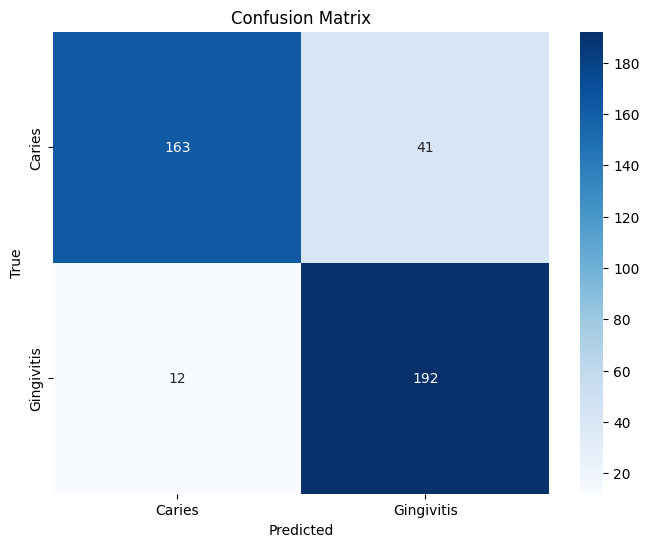

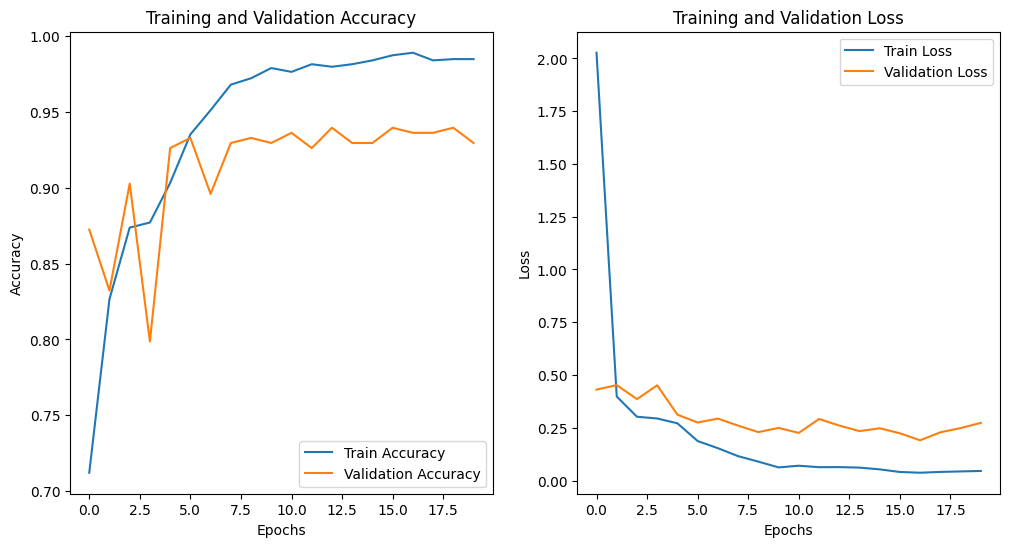

Model saved as 'oral_disease_classifier.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Class: Gingivitis (Confidence: 1.00)


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Preprocessing
def load_data(data_dir, img_size=(224, 224)):
    images, labels = [], []
    classes = os.listdir(data_dir)
    for label, disease_class in enumerate(classes):
        class_dir = os.path.join(data_dir, disease_class)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return images, labels

# Define paths
train_dir = "D:/oralens/OA/TRAIN"  # Update with actual path
test_dir = "D:/oralens/OA/TEST"  # Update with actual path

# Load dataset
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Split training data into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 2. Model Definition
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Model Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

# 4. Model Evaluation
def evaluate_model(model, X_test, y_test):
    # Predict on test set
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Caries", "Gingivitis"]))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Caries", "Gingivitis"], yticklabels=["Caries", "Gingivitis"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate the model
evaluate_model(model, X_test, y_test)

# 5. Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Save the model
model.save("oral_disease_classifier.h5")
print("Model saved as 'oral_disease_classifier.h5'")

# 6. Predict on a Single Image
def predict_image(model, image_path, img_size=(224, 224)):
    class_names = ["Caries", "Gingivitis"]
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found or unable to load.")
        return
    img_resized = cv2.resize(img, img_size) / 255.0
    img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    print(f"Predicted Class: {class_names[predicted_class]} (Confidence: {predictions[0][predicted_class]:.2f})")

# Example usage of predict_image
image_path = "D:/oralens/OA/TEST/Gingivitis/27_1.jpg"  # Update with actual image path
predict_image(model, image_path)


In [8]:
y_pred = np.argmax(model.predict(X_test), axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
